## Awesome New in Matplotlib 3.4.0 (WIP)



![](https://www.mememaker.net/static/images/memes/3598885.jpg)

It is very exciting that the library version is updated.
Here are some of the updated contents that are easy to use.

## Download New Version!!

Now Kaggle enviroment Update matplotlib 3.4.0!!

You don't have to download new version in kaggle notebook. 

In [1]:
# %pip install matplotlib==3.4

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
print(mpl.__version__)

3.4.0


In [3]:
mpl.rcParams['figure.dpi'] = 120

## Figure Subfigures

- [More Detail about figure subfigures](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subfigures.html)

The figure now has a sub figure.

Now, there are cases where you have to go through a total of 4 times as ax in the axes in the subfigure in the figure.

Each figure can likewise use `suptitle` to set its title, and `text` can be used to add text.

It is expected that it will be easier to draw a storyboard now.

You can freely adjust the size of the figure by using the `gridspec`, so you can expect interesting work.

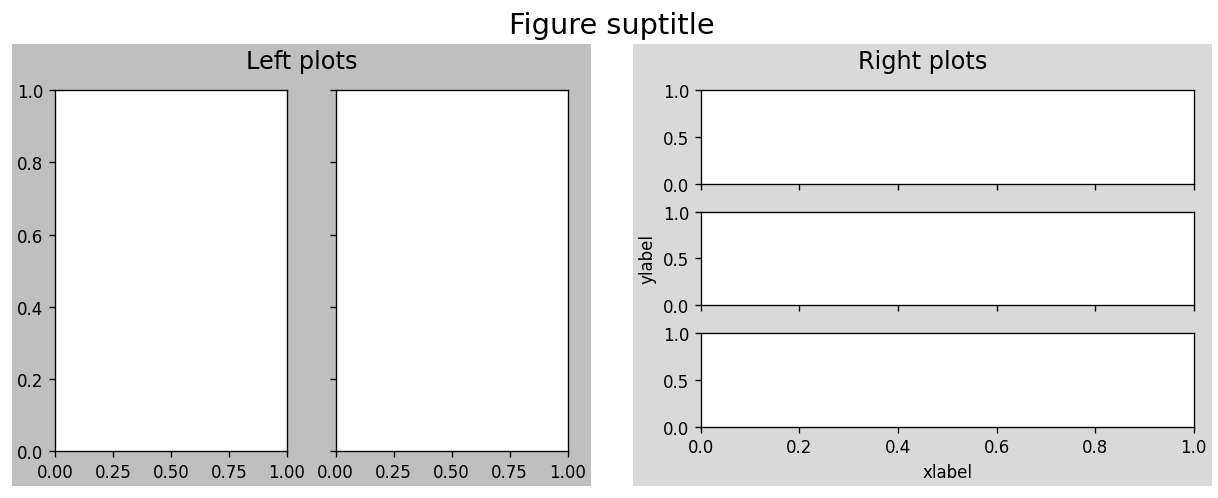

In [4]:
fig = plt.figure(constrained_layout=True, figsize=(10, 4))
subfigs = fig.subfigures(1, 2, wspace=0.07)

axsLeft = subfigs[0].subplots(1, 2, sharey=True)
subfigs[0].set_facecolor('0.75')

subfigs[0].suptitle('Left plots', fontsize='x-large')

axsRight = subfigs[1].subplots(3, 1, sharex=True)
for nn, ax in enumerate(axsRight):
    if nn == 2:
        ax.set_xlabel('xlabel')
    if nn == 1:
        ax.set_ylabel('ylabel')

subfigs[1].set_facecolor('0.85')
subfigs[1].suptitle('Right plots', fontsize='x-large')
fig.suptitle('Figure suptitle', fontsize='xx-large')

plt.show()

## Figure supxlabel/supylabel

Like set_xlabel and set_ylabel of ax, you can specify xlabel and ylabel in the figure. 

The method names are `fig.supxlabel`, `fig.ylabel`. Perhaps you can expect seaborn's pairplot and facet grid-like functions to be updated through this update.

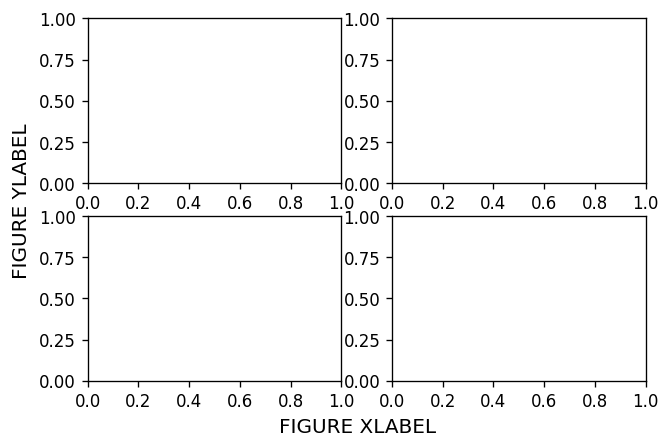

In [5]:
fig, ax = plt.subplots(2, 2)

fig.supxlabel('FIGURE XLABEL')
fig.supylabel('FIGURE YLABEL')

plt.show()


## Subplot Mosaic

Constructing subplots with text is a feature already provided since 3.3.

However, it is not well known, so the basic grammar is as follows.

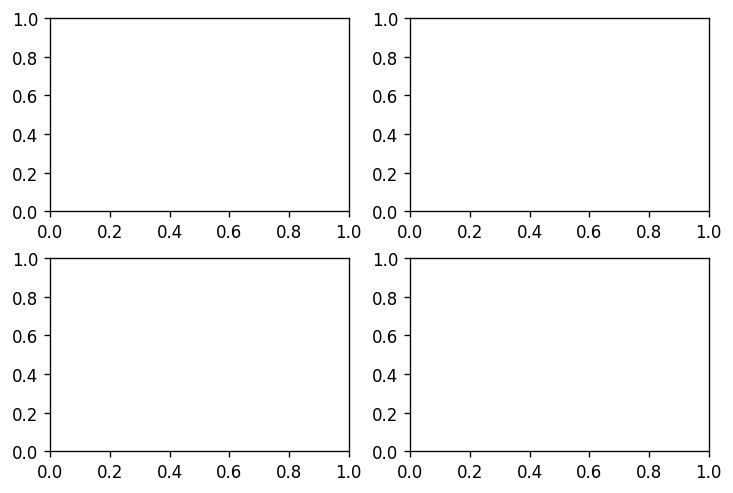

In [6]:
layout = """
    AB
    CD
    """

fig = plt.figure(constrained_layout=True)
ax_dict = fig.subplot_mosaic(layout)
plt.show()

This layout can now be provided in a single line.

(<Figure size 720x480 with 3 Axes>,
 {'B': <AxesSubplot:label='B'>,
  'C': <AxesSubplot:label='C'>,
  'A': <AxesSubplot:label='A'>})

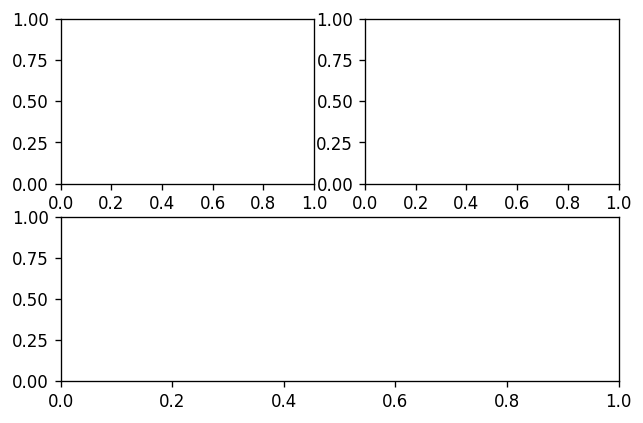

In [7]:
plt.subplot_mosaic("AB;CC")

## Bar Label

Quite a few books mention that providing specific numerical values in bar plots by adding text improves readability. 

So, originally, `ax.text` was used to add text to each position, but this time, a method is provided to allow easy addition, called bar_label. The position can also be set as middle, top, bottom, etc. It will be very useful for visualization in the future.

In [8]:
N = 5
menMeans = (20, 35, 30, 35, -27)
womenMeans = (25, 32, 34, 20, -25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

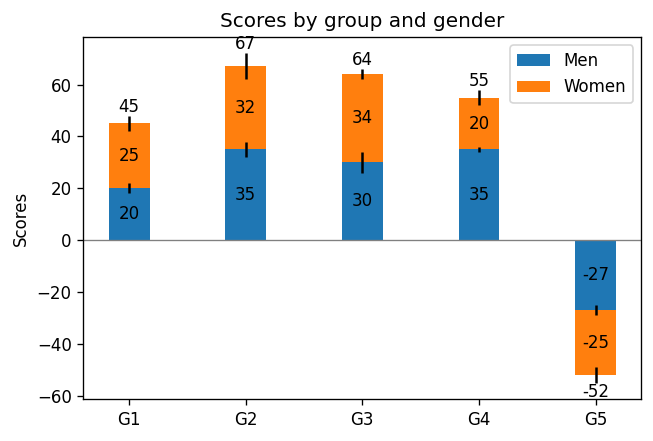

In [9]:
fig, ax = plt.subplots()

p1 = ax.bar(ind, menMeans, width, yerr=menStd, label='Men')
p2 = ax.bar(ind, womenMeans, width,
            bottom=menMeans, yerr=womenStd, label='Women')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)

plt.show()

## Hatch Style Barplot

You can now visualize using patterns in bar graphs as well. Markers used in line graphs and scatter plots can now be used in bars, but the pattern of the bars can now be passed through a parameter called hatch.

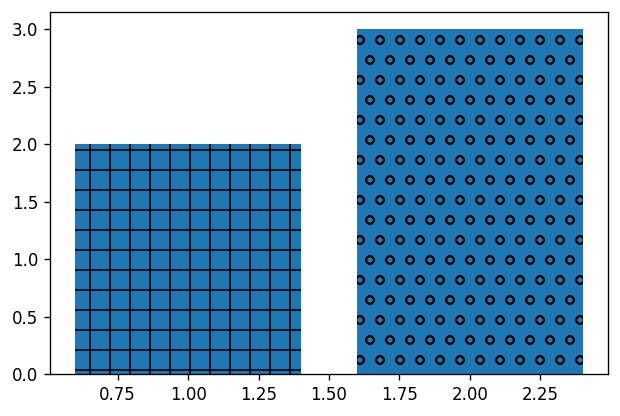

In [10]:
from matplotlib.patches import Ellipse, Polygon

fig, ax = plt.subplots()
ax.bar([1, 2], [2, 3], hatch=['+', 'o'])
plt.show()

plt.show()

## Spine access Shortcuts

I've done a lot of exercises to clean up the visualization by removing the spine. Usually approached like a dictionary.

But now the spine is changed to the class Spine and you can access it as an attribute.

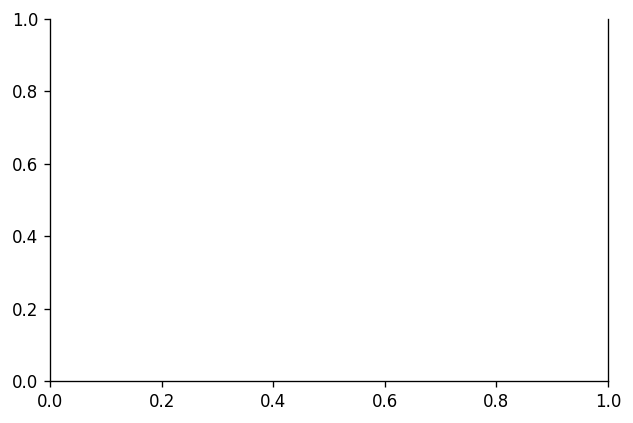

In [11]:
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines.top.set_visible(False)
plt.show()

You can pass it as a list like this

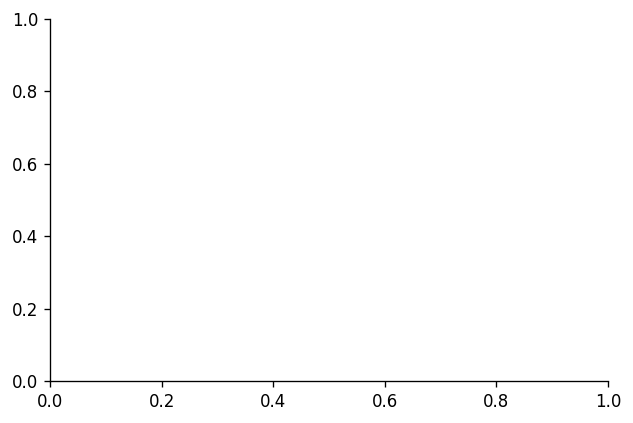

In [12]:
fig, ax = plt.subplots()
ax.spines[['top', 'right']].set_visible(False)
plt.show()

You can also adjust the whole thing at once.

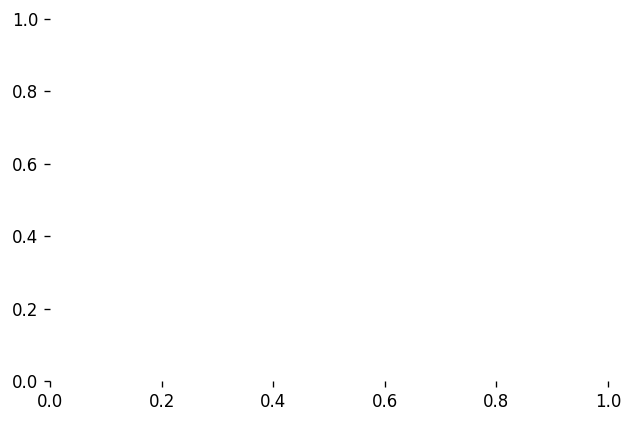

In [13]:
fig, ax = plt.subplots()
ax.spines[:].set_visible(False)
plt.show()

> Under this line. Not Practical, but Interesting Feature 

--- 


## Scatter with Pcolormash as Colormap

Previously, the alpha value controlling transparency in collections could be specified only as a scalar applied to all elements in the collection. For example, all the markers in a scatter plot, or all the quadrilaterals in a pcolormesh plot, would have the same alpha value.

Now it is possible to supply alpha as an array with one value for each element (marker, quadrilateral, etc.) in a collection.

Text(0.5, 1.0, "c=['r', 'g', 'b', 'c', 'm']")

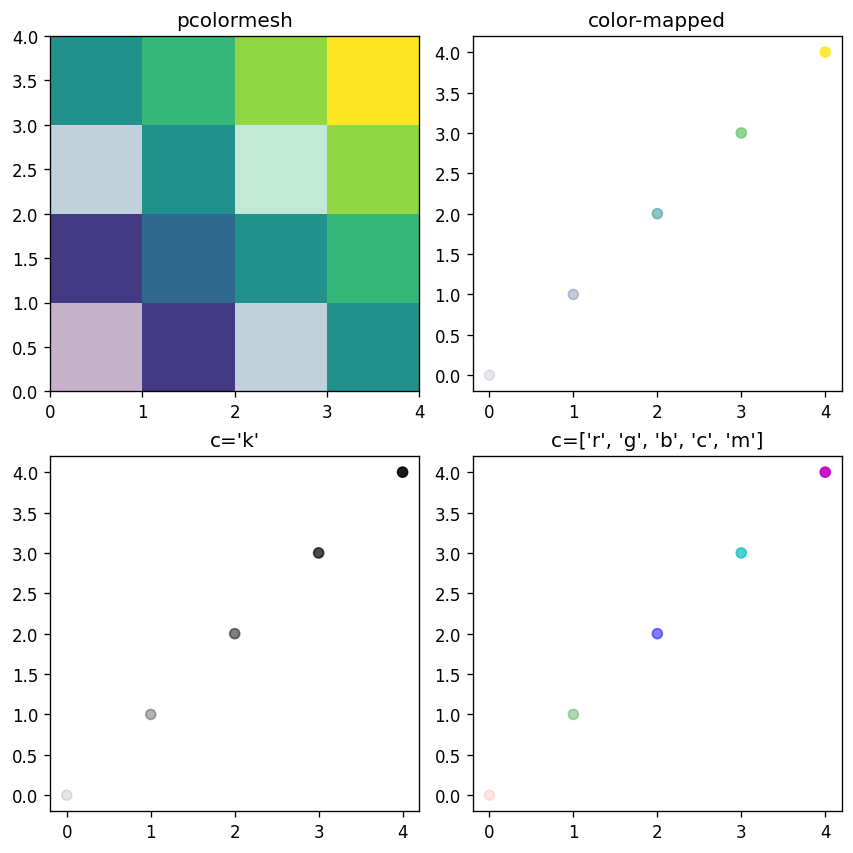

In [14]:
x = np.arange(5, dtype=float)
y = np.arange(5, dtype=float)
# z and zalpha for demo pcolormesh
z = x[1:, np.newaxis] + y[np.newaxis, 1:]
zalpha = np.ones_like(z)
zalpha[::2, ::2] = 0.3  # alternate patches are partly transparent

# s and salpha for demo scatter
s = x
salpha = np.linspace(0.1, 0.9, len(x))  # just a ramp

fig, axs = plt.subplots(2, 2, figsize=(7, 7), constrained_layout=True)
axs[0, 0].pcolormesh(x, y, z, alpha=zalpha)
axs[0, 0].set_title("pcolormesh")
axs[0, 1].scatter(x, y, c=s, alpha=salpha)
axs[0, 1].set_title("color-mapped")
axs[1, 0].scatter(x, y, c='k', alpha=salpha)
axs[1, 0].set_title("c='k'")
axs[1, 1].scatter(x, y, c=['r', 'g', 'b', 'c', 'm'], alpha=salpha)
axs[1, 1].set_title("c=['r', 'g', 'b', 'c', 'm']")

## Colormap shows on Jupyter Notebook

The matplotlib.colors.Colormap object now has image representations for IPython / Jupyter backends. Cells returning a colormap on the last line will display an image of the colormap.

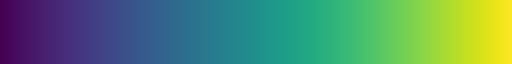

In [15]:
cmap = plt.get_cmap('viridis')#.with_extremes(bad='r', under='g', over='b')
cmap

## Support callable for formatting of Sankey labels

The format parameter of matplotlib.sankey.Sankey can now accept callables.

This allows the use of an arbitrary function to label flows, for example allowing the mapping of numbers to emoji.

> However, matplotlib has not yet entered the desired form of emoji regardless of the font. Hope to improve in the next version

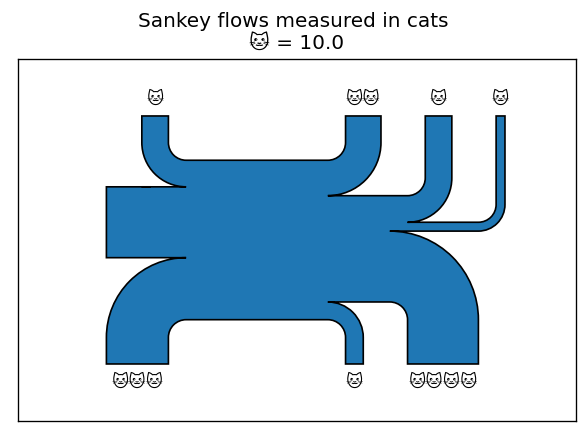

In [16]:
from matplotlib.sankey import Sankey
import math


def display_in_cats(values, min_cats, max_cats):
    def display_in_cat_scale(value):
        max_value = max(values, key=abs)
        number_cats_to_show = \
            max(min_cats, math.floor(abs(value) / max_value * max_cats))
        return str(number_cats_to_show * '🐱')

    return display_in_cat_scale


flows = [35, 15, 40, -20, -15, -5, -40, -10]
orientations = [-1, 1, 0, 1, 1, 1, -1, -1]

# Cats are good, we want a strictly positive number of them
min_cats = 1
# More than four cats might be too much for some people
max_cats = 4

cats_format = display_in_cats(flows, min_cats, max_cats)

sankey = Sankey(flows=flows, orientations=orientations, format=cats_format,
                offset=.1, head_angle=180, shoulder=0, scale=.010)

diagrams = sankey.finish()

diagrams[0].texts[2].set_text('')

plt.title(f'Sankey flows measured in cats \n'
          f'🐱 = {max(flows, key=abs) / max_cats}')

plt.show()


## More about Hatches

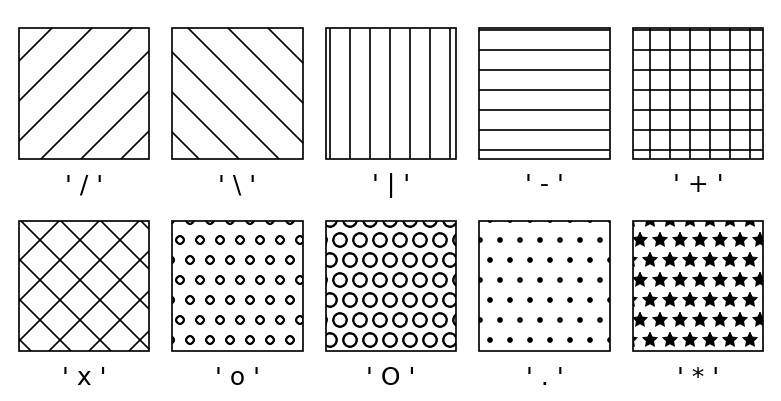

In [17]:
from matplotlib.patches import Rectangle

fig, axs = plt.subplots(2, 5, constrained_layout=True, figsize=(6.4, 3.2))

hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']


def hatches_plot(ax, h):
    ax.add_patch(Rectangle((0, 0), 2, 2, fill=False, hatch=h))
    ax.text(1, -0.5, f"' {h} '", size=15, ha="center")
    ax.axis('equal')
    ax.axis('off')

for ax, h in zip(axs.flat, hatches):
    hatches_plot(ax, h)

Hatching patterns can be repeated to increase the density.

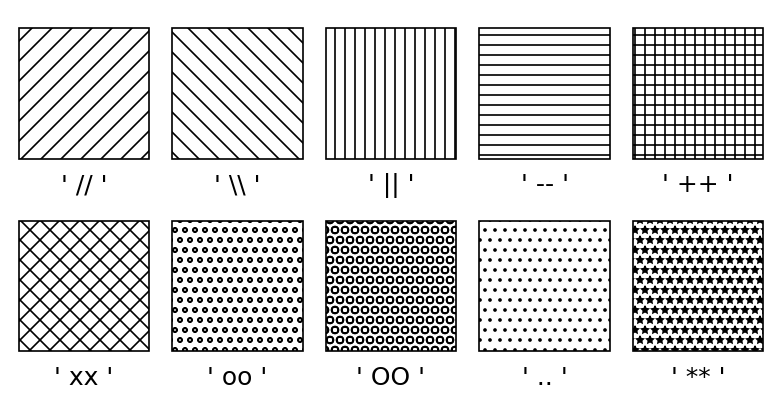

In [18]:
fig, axs = plt.subplots(2, 5, constrained_layout=True, figsize=(6.4, 3.2))

hatches = ['//', '\\\\', '||', '--', '++', 'xx', 'oo', 'OO', '..', '**']

for ax, h in zip(axs.flat, hatches):
    hatches_plot(ax, h)

Hatching patterns can be combined to create additional patterns.

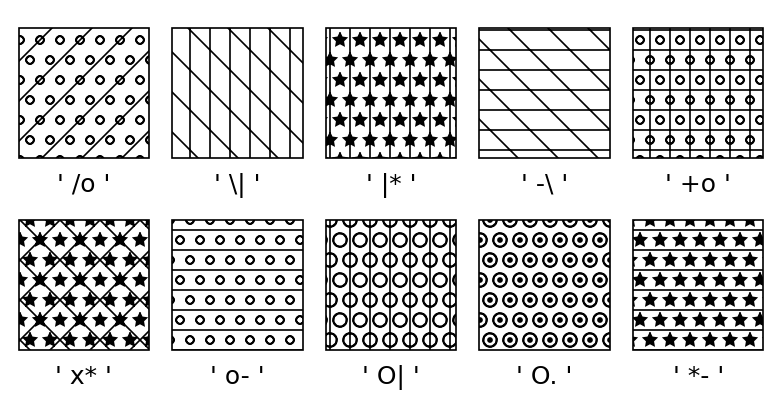

In [19]:
fig, axs = plt.subplots(2, 5, constrained_layout=True, figsize=(6.4, 3.2))

hatches = ['/o', '\\|', '|*', '-\\', '+o', 'x*', 'o-', 'O|', 'O.', '*-']

for ax, h in zip(axs.flat, hatches):
    hatches_plot(ax, h)

## Reference 

- [What's new in Matplotlib 3.4.0](https://matplotlib.org/stable/users/whats_new.html#what-s-new-in-matplotlib-3-4-0)